In [3]:
import pandas_datareader as pdr
import pandas as pd



In [4]:
df=pd.read_csv("C:\\Users\\Tammana\\Downloads\\AAPL.csv")


In [5]:
df.head()

,Date,Price,Weight,Avg-year,stability
0,01-Jun-23,2345,70.0,3.0,5.0
1,02-Jun-23,1989,75.0,5.0,4.5
2,03-Jun-23,2345,76.0,7.0,6.7
3,04-Jun-23,3455,64.0,4.0,5.2
4,05-Jun-23,4546,68.0,6.0,6.0


In [6]:
df1=df.reset_index()['Price']
df1.shape

(69,)

In [7]:
import matplotlib.pyplot as plt

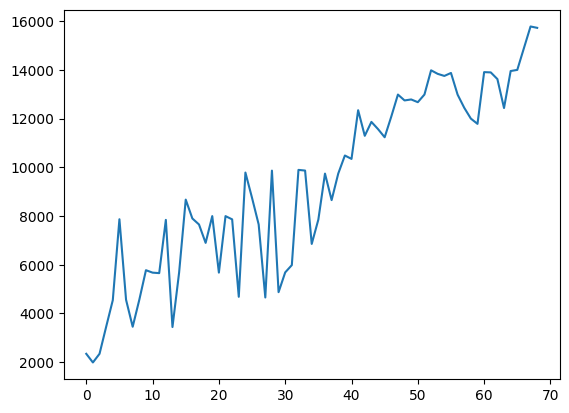

In [8]:
plt.plot(df1)

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(69, 1)

In [10]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
training_size,test_size

(48, 21)

In [11]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)  

In [13]:
time_step=5
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)
print(X_train)

[[0.02581019 0.         0.02581019 0.1062858  0.18538389]
 [0.         0.02581019 0.1062858  0.18538389 0.4263032 ]
 [0.02581019 0.1062858  0.18538389 0.4263032  0.1866889 ]
 [0.1062858  0.18538389 0.4263032  0.1866889  0.1063583 ]
 [0.18538389 0.4263032  0.1866889  0.1063583  0.1866889 ]
 [0.4263032  0.1866889  0.1063583  0.1866889  0.27463206]
 [0.1866889  0.1063583  0.1866889  0.27463206 0.26738201]
 [0.1063583  0.1866889  0.27463206 0.26738201 0.26593199]
 [0.1866889  0.27463206 0.26738201 0.26593199 0.42441818]
 [0.27463206 0.26738201 0.26593199 0.42441818 0.10548829]
 [0.26738201 0.26593199 0.42441818 0.10548829 0.26745451]
 [0.26593199 0.42441818 0.10548829 0.26745451 0.48473864]
 [0.42441818 0.10548829 0.26745451 0.48473864 0.42855071]
 [0.10548829 0.26745451 0.48473864 0.42855071 0.41071558]
 [0.26745451 0.48473864 0.42855071 0.41071558 0.35597767]
 [0.48473864 0.42855071 0.41071558 0.35597767 0.43572827]
 [0.42855071 0.41071558 0.35597767 0.43572827 0.26745451]
 [0.41071558 0

In [14]:
print(X_test.shape),print(ytest.shape)

(15, 5)
(15,)


(None, None)

In [15]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.2133 - val_loss: 0.6693
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 0.1994 - val_loss: 0.6334
Epoch 3/100
1/1 [==============================] - 0s 56ms/step - loss: 0.1855 - val_loss: 0.5961
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 0.1714 - val_loss: 0.5569
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 0.1568 - val_loss: 0.5154
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 0.1417 - val_loss: 0.4711
Epoch 7/100
1/1 [==============================] - 0s 64ms/step - loss: 0.1260 - val_loss: 0.4240
Epoch 8/100
1/1 [==============================] - 0s 48ms/step - loss: 0.1099 - val_loss: 0.3739
Epoch 9/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0934 - val_loss: 0.3210
Epoch 10/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0769 - val_loss: 0.2660
Epoch 11/100
1/1 [===

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 56ms/step


In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8069.15711916301

In [24]:
math.sqrt(mean_squared_error(ytest,test_predict))

13432.09354025566

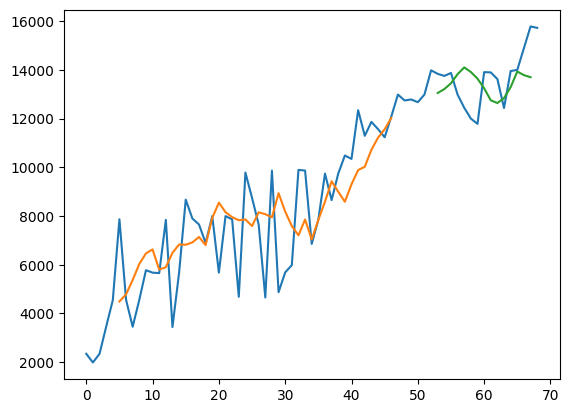

In [25]:
look_back=5
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()